In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

import db_conn

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine


In [2]:
def create_earthquake_dict(r):
    return {
    "magnitude" : float(r[0]),
    "place": r[1],
    "time": int(r[2]),
    "timezone": float(r[3]),
    "url": r[4],
    "tsunami" :  int(r[5]),
    "ids" : r[6],
    "specific_type" :  r[7],
    "geometry" :  r[8],
    "country" : r[9],
    "lat" : float(r[10]),
    "lng" :  float(r[11]),
    "depth" :  float(r[12])
    }

In [3]:
sel = [db_conn.earthquakes.magnitude, db_conn.earthquakes.place, db_conn.earthquakes.time, db_conn.earthquakes.timezone, db_conn.earthquakes.url, db_conn.earthquakes.tsunami, db_conn.earthquakes.ids, db_conn.earthquakes.specific_type, db_conn.earthquakes.geometry, db_conn.earthquakes.country_de, db_conn.earthquakes.lng, db_conn.earthquakes.lat, db_conn.earthquakes.depth]

In [4]:
all_results = db_conn.session.query(*sel).all()

In [5]:
all_earthquakes = []

for r in all_results:
    transformed_dict = create_earthquake_dict(r)
    all_earthquakes.append(transformed_dict)


df = pd.DataFrame(all_earthquakes)

In [6]:
DROP_COLUMNS = ["ids", "geometry", "place", "url"]
DROP_MORE = ["ids", "geometry", "place", "url", "magnitude", "specific_type", "timezone", "time", "depth", "tsunami"]
abridged_df = df.drop(DROP_COLUMNS, axis = 1)
df_2d=df.drop(DROP_MORE, axis = 1)

In [7]:
abridged_df.head(n=2)

,country,depth,lat,lng,magnitude,specific_type,time,timezone,tsunami
0,United States,6.86,34.142666,-117.026665,1.29,earthquake,1561839198350,-480.0,0
1,M 5.0 - North of Ascension Island,10.00,-1.753100,-13.039500,5.00,earthquake,1561837880892,-60.0,0


In [8]:
abridged_ddf = pd.get_dummies(abridged_df, columns = ["specific_type"])

In [9]:
lb_make = LabelEncoder()
df_2d["country"] = lb_make.fit_transform(df_2d["country"])

In [25]:
# y = abridged_ddf["country"].values
# X = abridged_ddf.drop('country', axis=1).values

y = df_2d["country"].values
X = df_2d.drop('country', axis=1).values

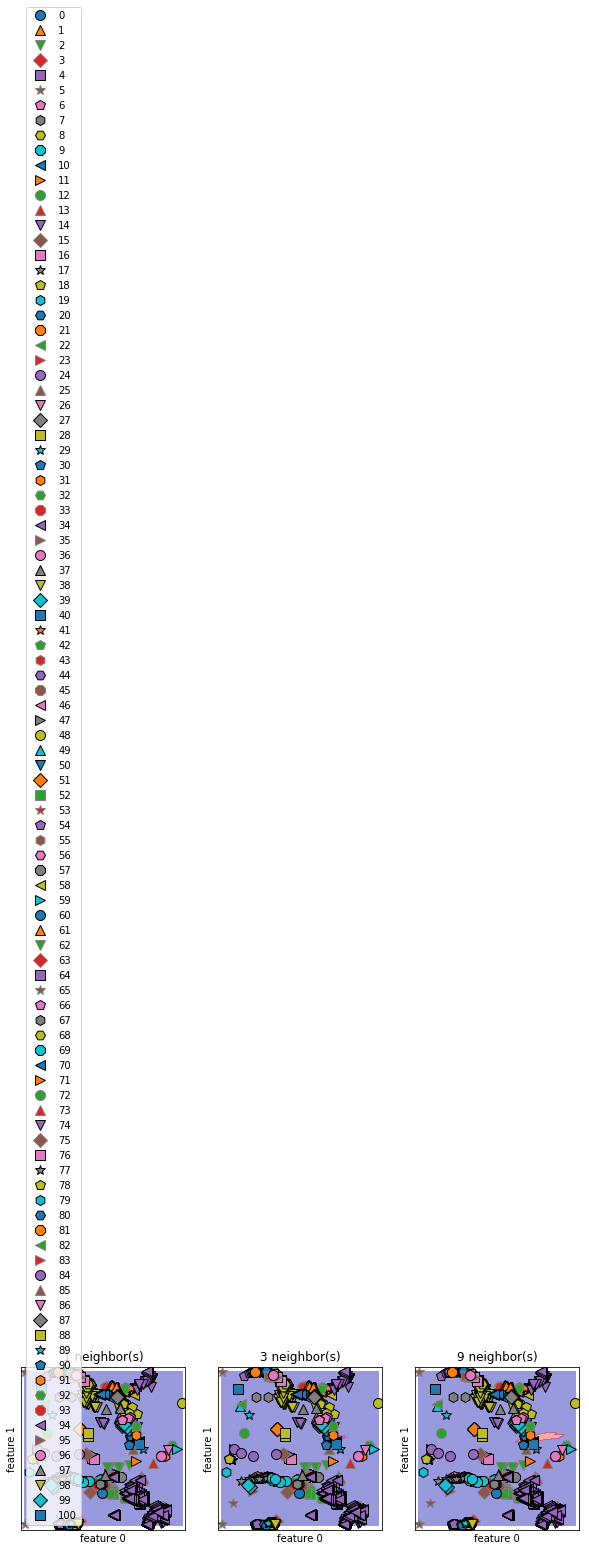

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [ ]:
print("X.shape:", X.shape)

In [ ]:
print("y.shape:", y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
# prediction = knn.predict(X_test)
# print("Prediction:", prediction)
# print("Predicted target name:",
#        abridged_df['country'][prediction])

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

In [ ]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

In [ ]:
plt.boxplot(X_train_scaled, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [ ]:
%matplotlib inline

In [ ]:
X